In [44]:
import shutil
from google.colab import files

# Create zip file
shutil.make_archive("hist", "zip", "wells")

import os

# Rename file
os.rename("hist.zip", "hist.txt")


# Download file
files.download("hist.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-30-a85ce93694bf>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)


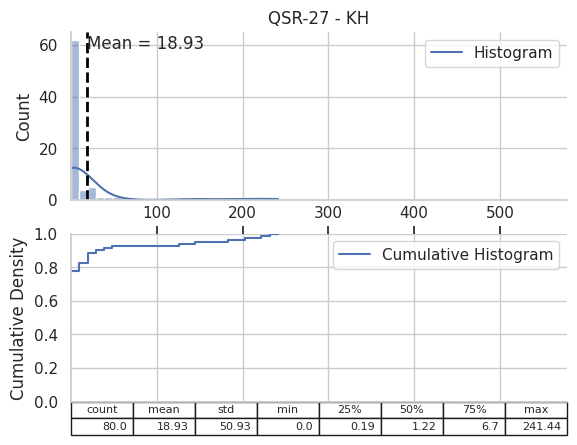

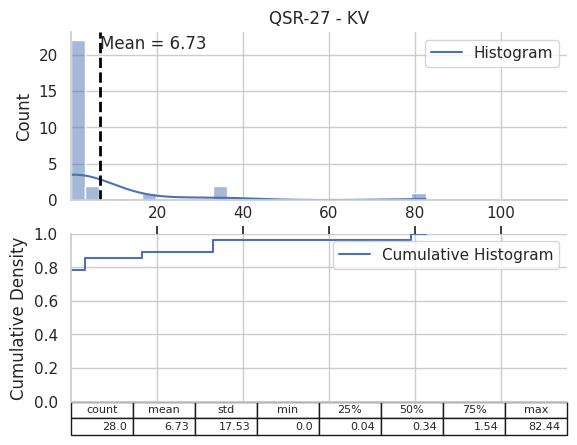

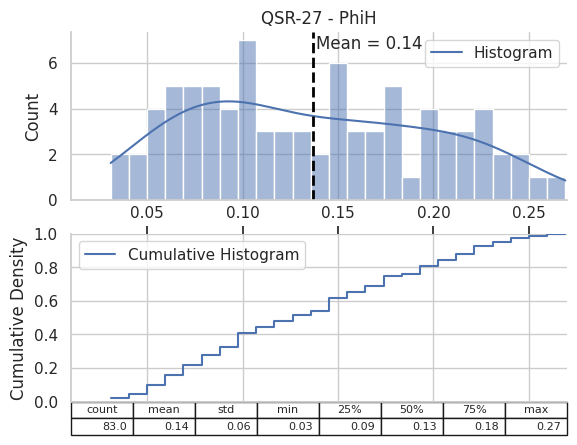

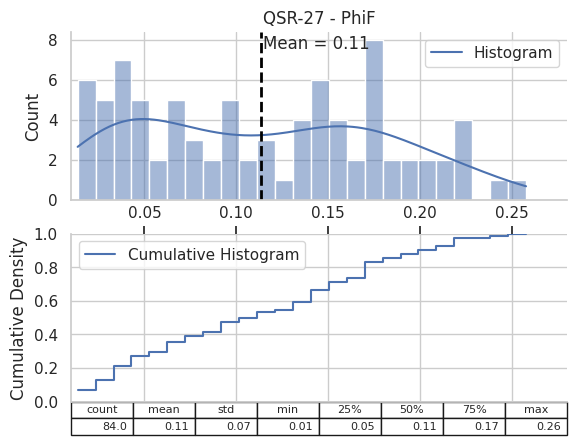

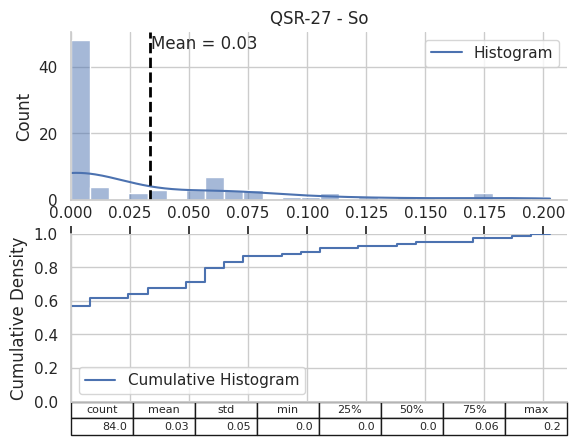

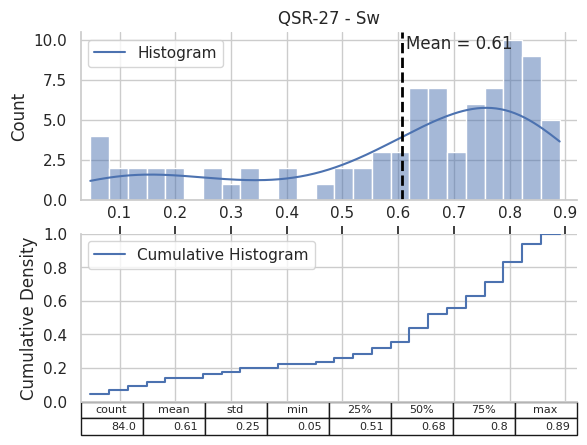

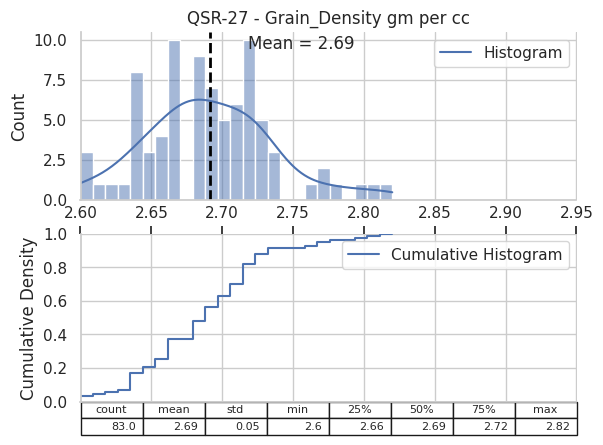

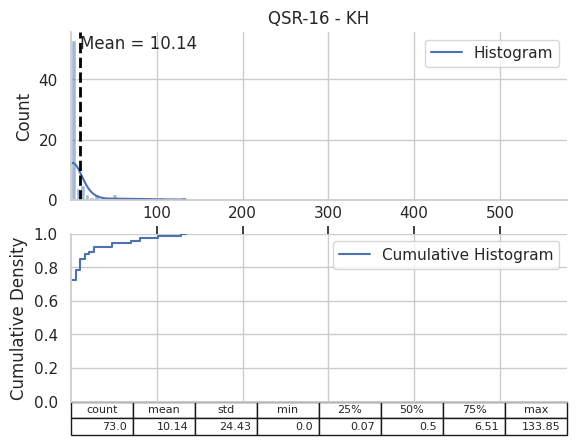

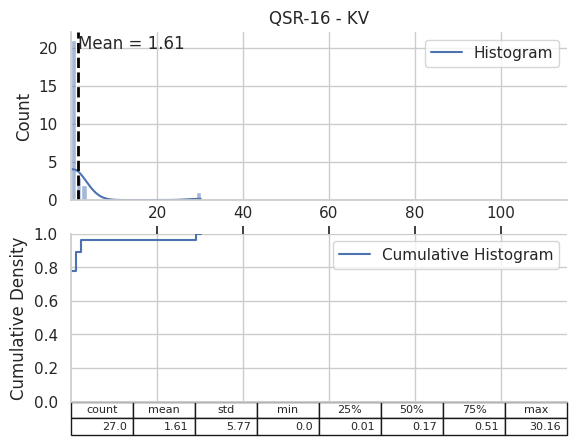

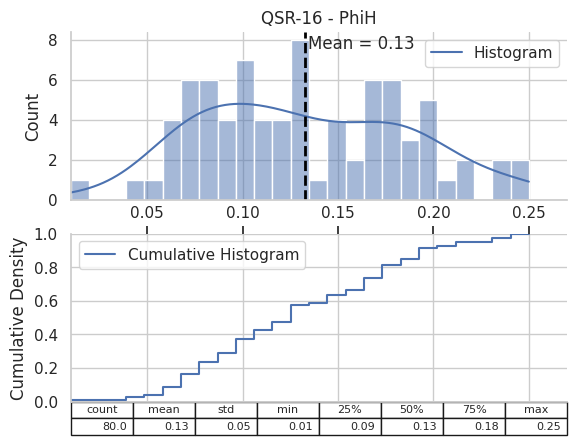

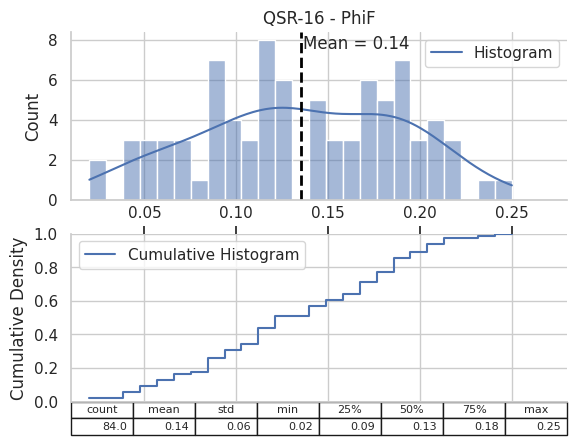

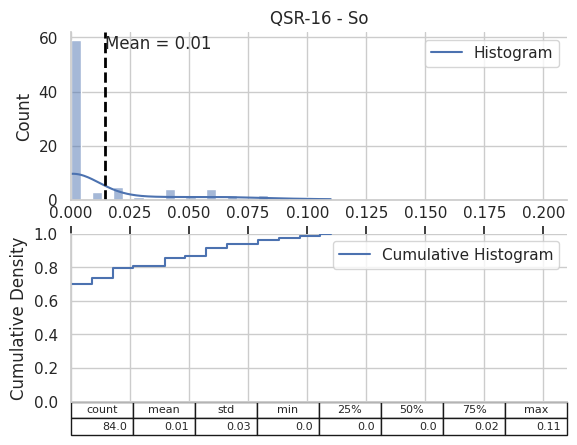

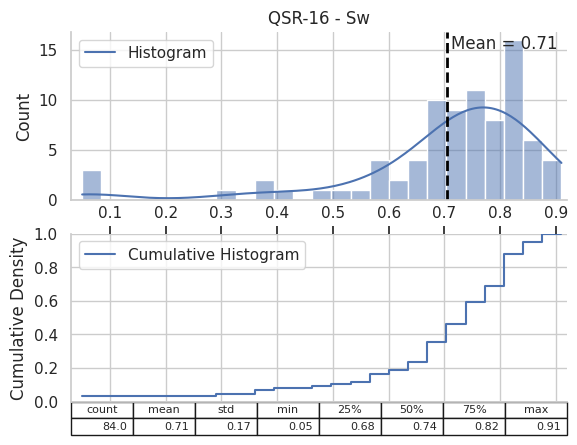

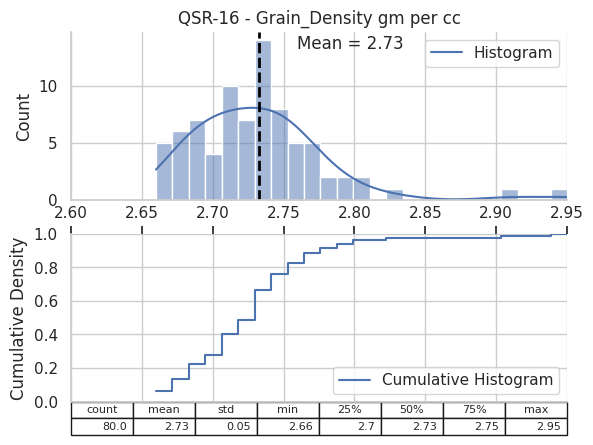

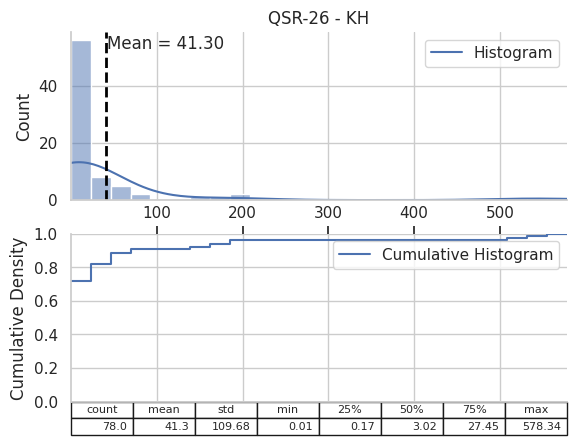

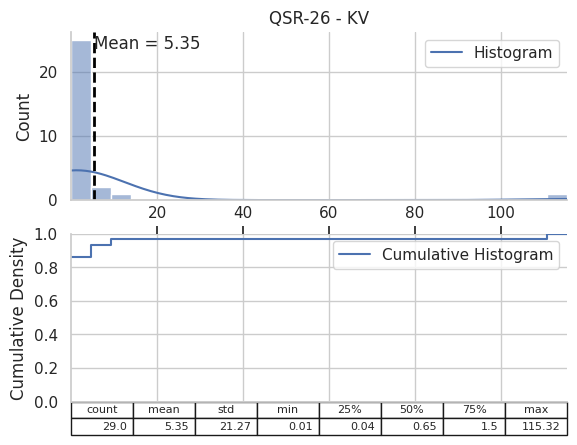

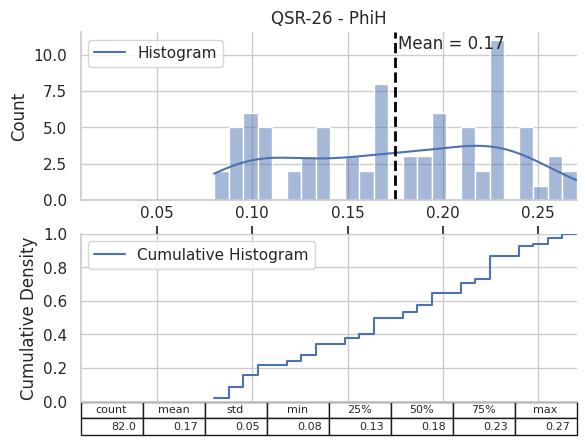

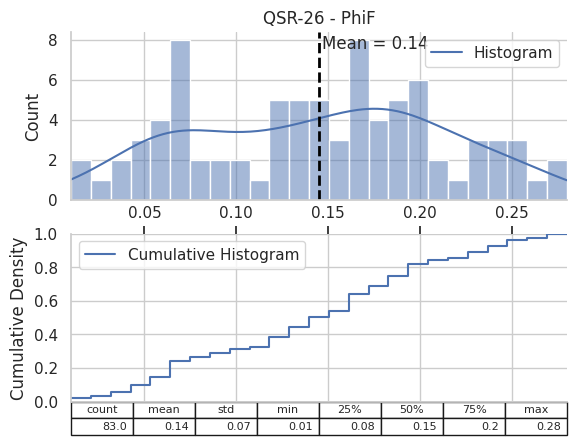

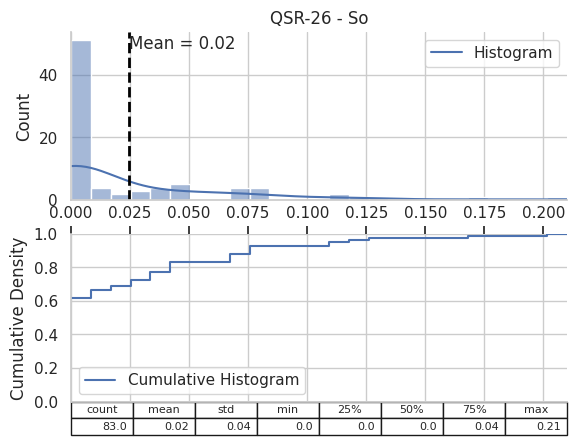

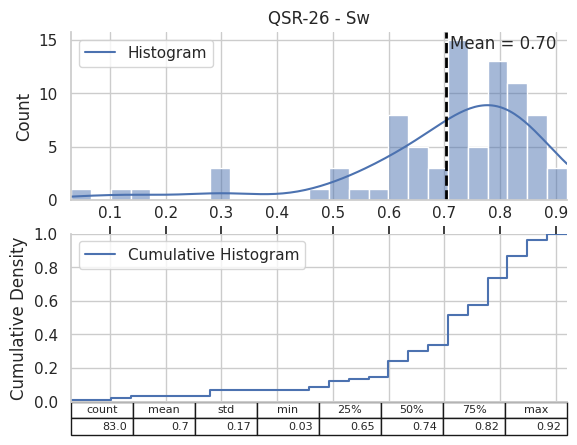

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load data from CSV file
df = pd.read_csv("Data1.csv")

# Define the features to plot
features = ["KH", "KV", "PhiH", "PhiF", "So", "Sw","Grain_Density gm per cc"]

# Define the wells to plot
wells = df["Well"].unique()



# Loop over each well and feature to create a plot
for well in wells:
    for feature in features:
        x_min=df[feature].min()
        x_max=df[feature].max()


        # Filter the data for the current well and feature
        data = df.loc[df["Well"] == well, feature]

        # Create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
        sns.set(style="whitegrid")
        # Plot the histogram on the primary Y axis
        sns.histplot(data=data, ax=ax1, kde=True, bins=25,alpha=0.5)
        ax1.set_xlim(x_min,x_max)

        sns.despine()
        ax1.legend(["Histogram"])
        mean_value = np.mean(data)
        ax1.axvline(mean_value, color="black", linestyle='--', label=f"Mean ({mean_value:.2f})", linewidth=2)
        y_min, y_max = ax1.get_ylim()
        ax1.annotate(f"Mean = {mean_value:.2f}", xy=(mean_value*1.01, y_max * 0.9))


        # Plot the cumulative histogram on the secondary Y axis
        sns.histplot(data=data, ax=ax2, cumulative=True, stat="density", bins=25,element="step", fill=False)
        ax2.set_ylim(0,1)
        # Set the title of the plot
        ax1.set_title(f"{well} - {feature}")

        # Add a legend to the plot

        ax2.legend(["Cumulative Histogram"])

        # Add axis labels to the plot
        ax1.set_ylabel("Count")
        ax2.set_ylabel("Cumulative")
        ax2.set_xlabel("")
        ax2.xaxis.set_ticks_position('top')



        # Add a table with statistics below the plot
        stats = data.describe().to_frame().T.round(2)
        table = ax2.table(cellText=stats.values, colLabels=stats.columns, loc="bottom")

        # Set the font size of the table
        table.auto_set_font_size(True)
        table.set_fontsize(8)

        # Adjust the layout of the plot
        plt.subplots_adjust(hspace=0.2)
        plt.savefig (f"wells/{well}_{feature}.png",dpi=600)

#plt.show()
plt.close()

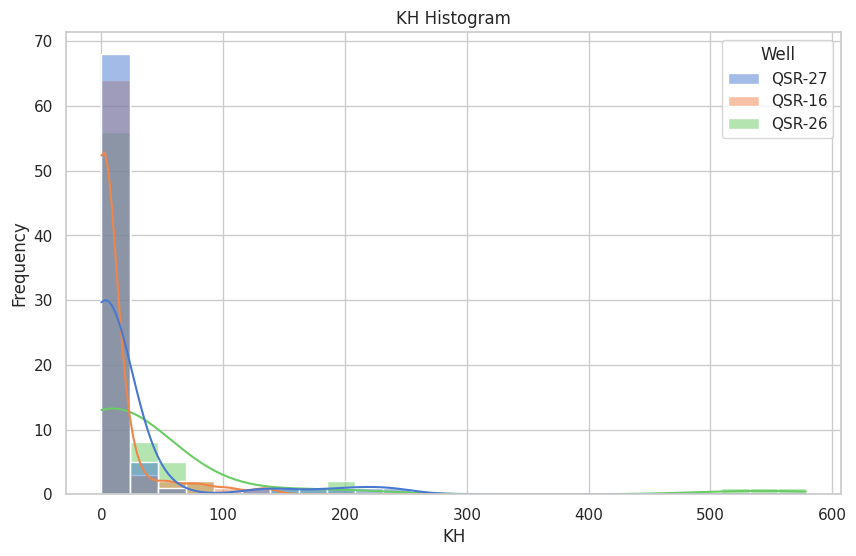

<Figure size 1000x600 with 0 Axes>

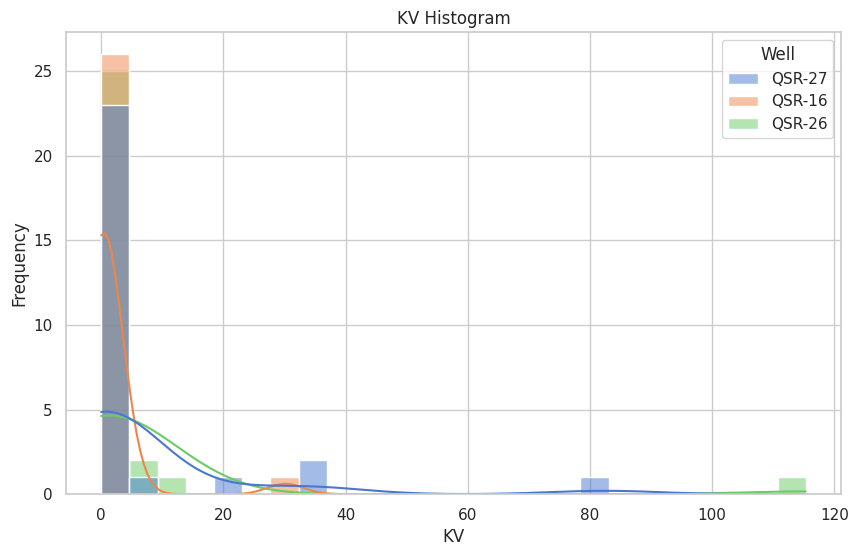

<Figure size 1000x600 with 0 Axes>

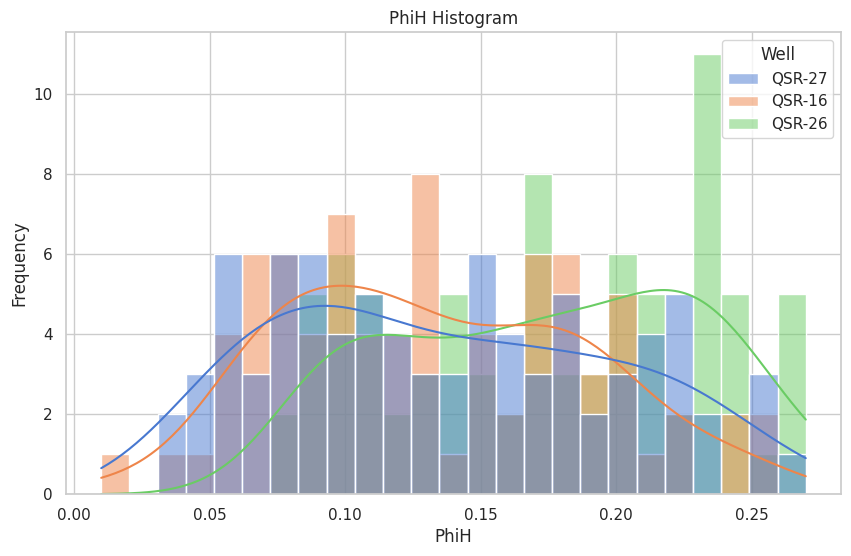

<Figure size 1000x600 with 0 Axes>

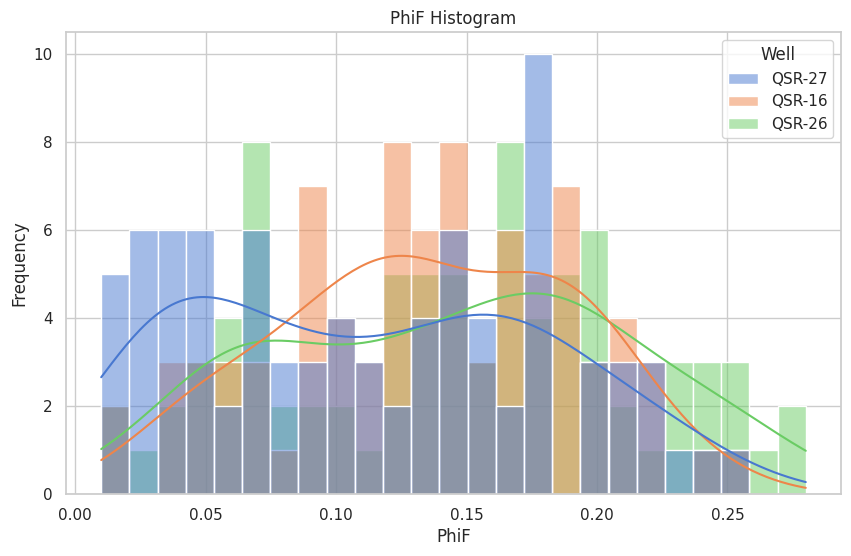

<Figure size 1000x600 with 0 Axes>

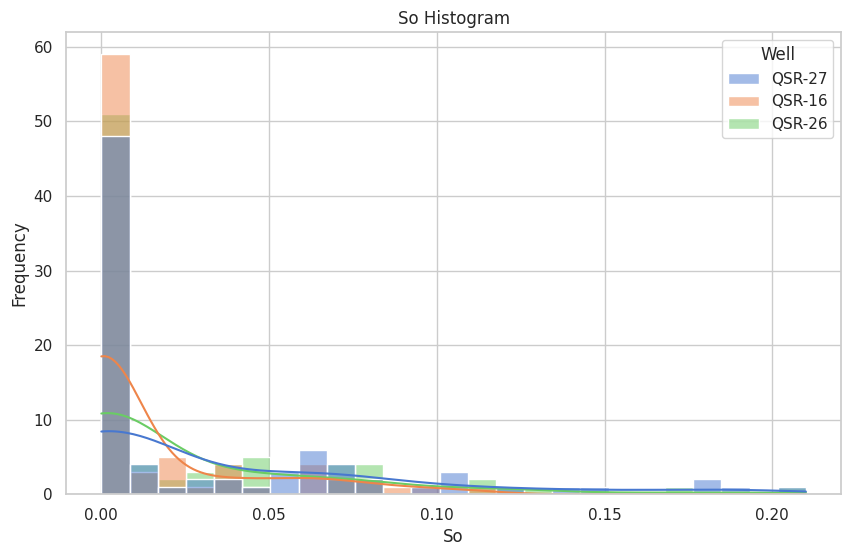

<Figure size 1000x600 with 0 Axes>

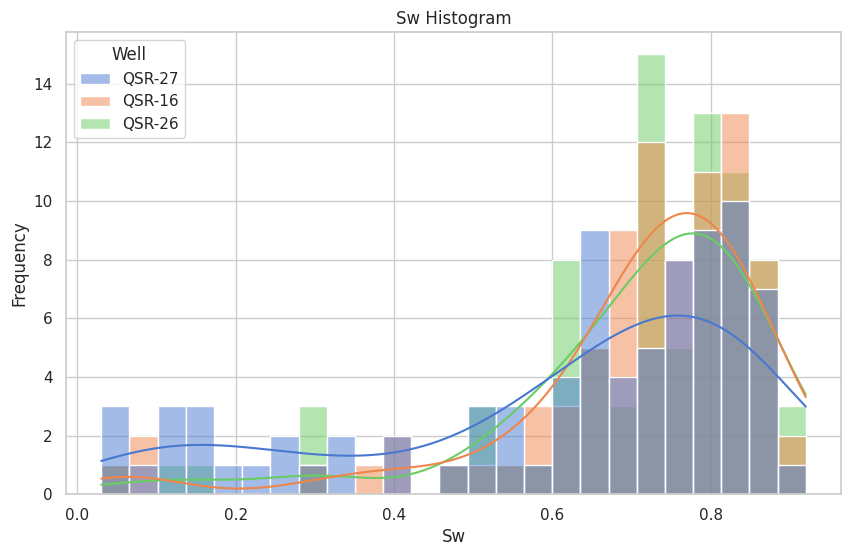

<Figure size 1000x600 with 0 Axes>

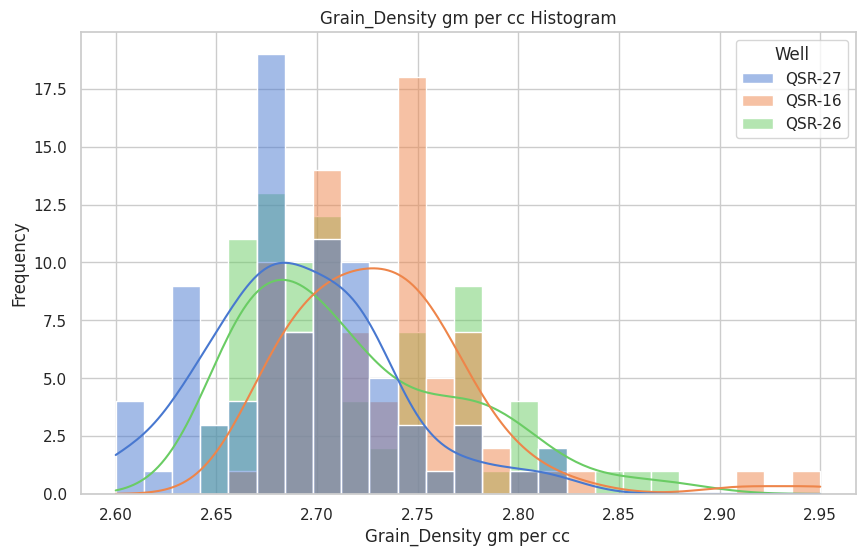

<Figure size 1000x600 with 0 Axes>

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("Data1.csv")

# List of features to create plots for
features = ["KH", "KV", "PhiH", "PhiF", "So", "Sw","Grain_Density gm per cc"]

# Customize the style of the plots
sns.set(style="whitegrid")

# Create subplots for each feature
for feature in features:

    plt.figure(figsize=(10, 6))
    plt.title(f"{feature} Histogram")

    # Create a histogram overlaying the wells
    sns.histplot(data=data, x=feature,hue="Well", bins=25, kde=True, common_norm=False, legend=True, palette="muted")
    # Add axis labels and legend
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.savefig (f"wells/{feature}_Histogram.png",dpi=600)

    plt.figure(figsize=(10, 6))
    #plt.title(f"{feature} Histogram")
    # Show the plot
    plt.show()


# %%


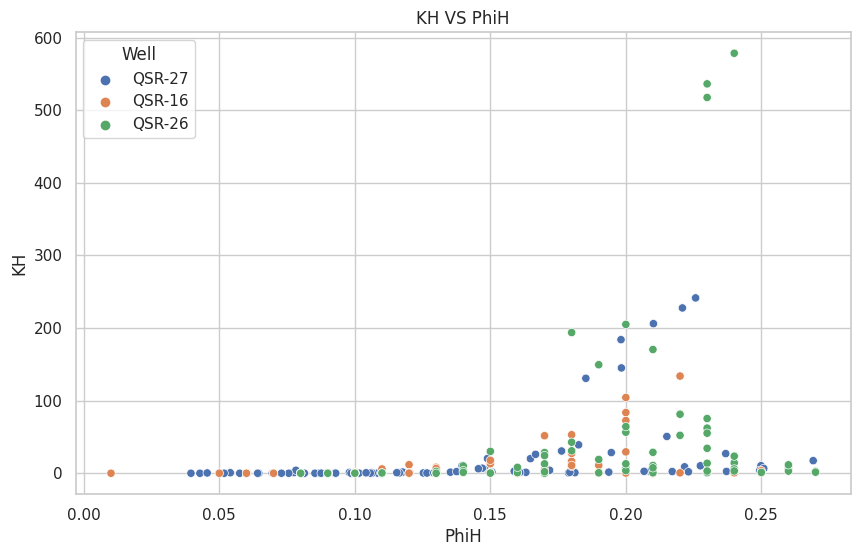

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("Data1.csv")

# List of features to create plots for
features = ["KH", "KV", "PhiH", "PhiF", "So", "Sw","Grain_Density gm per cc"]

# Customize the style of the plots
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
plt.title("KH VS PhiH")

# Create a histogram overlaying the wells
sns.scatterplot(data=data,x="PhiH",y="KH",hue="Well")
# Add axis labels and legend
plt.xlabel("PhiH")
plt.ylabel("KH")

plt.savefig ("wells/KH VS PhiH",dpi=600)

plt.show()

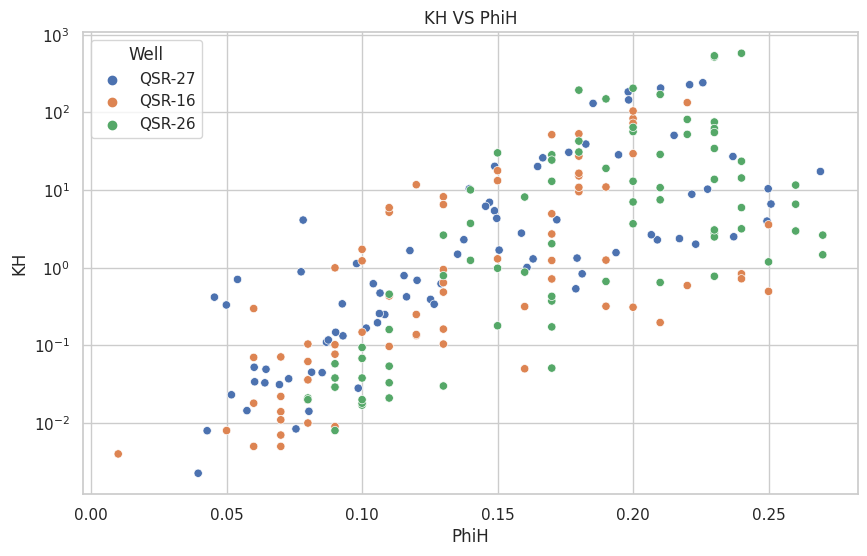

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("Data1.csv")

# List of features to create plots for
features = ["KH", "KV", "PhiH", "PhiF", "So", "Sw","Grain_Density gm per cc"]

# Customize the style of the plots
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
plt.title("KH VS PhiH")

# Create a histogram overlaying the wells
sns.scatterplot(data=data,x="PhiH",y="KH",hue="Well")
# Add axis labels and legend
plt.xlabel("PhiH")
plt.ylabel("KH")
plt.yscale('log')
plt.savefig ("wells/KH Log Scale VS PhiH",dpi=600)

plt.show()